# Clase Tutorial 7: Regresión Lineal Localmente Ponderada

## Ajustando los datos

- Supongamos que tenemos el problema supervisado de predecir precios de casas:

<div style="text-align: center;">
    <img style="width: 40%;" src="img/house_prices.jpg">
</div>

- Una pregunta que debemos hacernos cuando buscamos ajustar un modelo a los datos es: _¿Cuáles son los features que necesito/quiero?_
- Podriamos ajustar usando...
    - Una recta de la forma: $w_0 + w_1 x_1$
    - Una cuadrática de la forma: $w_0 + w_1 x_1 + w_2 x_2^2 $
    - Un ajuste personalizado como: $w_0 + w_1 x + w_2 \sqrt x + w_3 log(x) $
        - En este caso, deberiamos definir nuestras features como: 
            - $x_1 = x$
            - $x_2 = \sqrt x$
            - $x_3 = log(x)$

- Al definir estas nuevas características, la maquinaria de regresión lineal se presta naturalmente para ajustarse a estas funciones de features de entrada en su conjunto de datos.

## Algoritmos de selección de características
- Son algoritmos para decidir de forma automática cual es el conjunto de features que mejor ajusta a nuestros datos.
- Permiten responder la pregunta: _¿Cuál es la combinación de __funciones de nuestras features de entrada__ que resultan en la mejor performance del modelo?_
    - En otras palabras, ¿qué funciones de x (por ejemplo, $x^2$, $\sqrt x$, $log(x)$, $x^3$, $x^{2/3}$) resultan como features apropiadas para usar? 
- Para ajustar a un dataset que es inherentemente no lineal, una línea recta no sería la mejor opción y tendríamos que explorar polinomios.
- Para abordar el problema de ajustar datos que no son lineales y descubrir la mejor combinación de funciones de sus características a utilizar, entra en juego la regresión lineal localmente ponderada.

## Regresión Lineal Localmente Ponderada
- Es un algoritmo que modifica la regresión lineal para adaptarla a funciones no lineales.
- Consideremos el problema de predecir $y$ a partir de los valores de $x$:

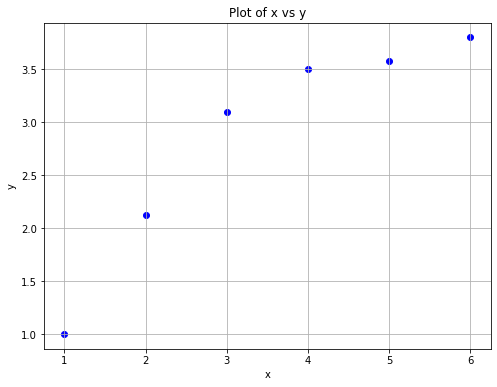

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x_values = [1, 2, 3, 4, 5, 6]
y_values = [1, 2.12, 3.1, 3.5, 3.58, 3.8]
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, marker='o', color='b')
plt.title('Plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


#### 1️⃣ Si ajustamos $y = w_0 + w_1 x$:



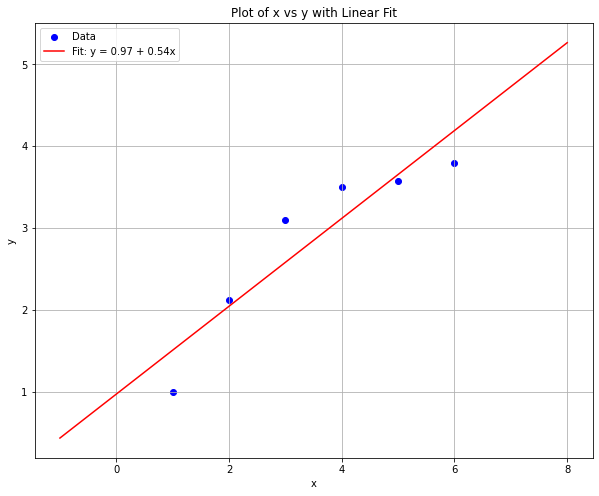

In [2]:
plt.figure(figsize=(10, 8))
plt.scatter(x_values, y_values, marker='o', color='b', label='Data')

# Ajustamos y = w_0 + w_1*x
X = np.array(x_values).reshape(-1, 1)
Y = np.array(y_values)
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add a column of ones for the intercept
W = np.linalg.inv(X.T @ X) @ X.T @ Y  # Calculate the parameters w_0 and w_1
x_fit = np.linspace(min(x_values)-2, max(x_values)+2, 100)
y_fit = W[0] + W[1] * x_fit
plt.plot(x_fit, y_fit, color='r', label=f'Fit: y = {W[0]:.2f} + {W[1]:.2f}x')

plt.title('Plot of x vs y with Linear Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

> ➡️ Vemos que los datos no están realmente en línea recta, por lo que el ajuste no es muy bueno. <font color=red>__Underfitting__</font>.


#### 2️⃣ Si ajustamos:  $y = w_0 + w_1 x + w_2 x^2$ (agregamos una feature más $x^2$):

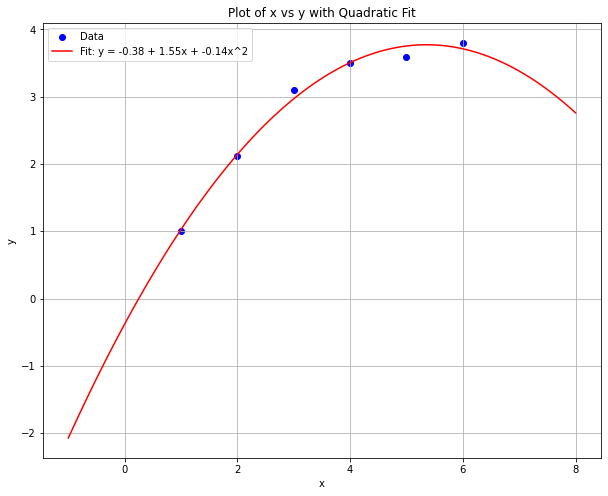

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(x_values, y_values, marker='o', color='b', label='Data')

# Ajustamos cuadratica y = w_0 + w_1*x + w_2*x^2
X = np.array(x_values).reshape(-1, 1)
Y = np.array(y_values)
X = np.hstack((np.ones((X.shape[0], 1)), X, X**2))  # Agregamos columnas para x and x^2
W = np.linalg.inv(X.T @ X) @ X.T @ Y  # Calculamos los parameters w_0, w_1, and w_2
x_fit = np.linspace(min(x_values)-2, max(x_values)+2, 100)
y_fit = W[0] + W[1] * x_fit + W[2] * x_fit**2
plt.plot(x_fit, y_fit, color='r', label=f'Fit: y = {W[0]:.2f} + {W[1]:.2f}x + {W[2]:.2f}x^2')

plt.title('Plot of x vs y with Quadratic Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

> ➡️ Vemos que obtenemos un mejor ajuste a los datos.<font color=green>__Good fit__</font>.
- Podría parecer que cuantas más features agregamos, mejor. Pero ya vimos que hay cierto riesgo en agregar demasiadas features.

#### 3️⃣ Si ajustamos $y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + w_4 x^4 + w_5 x^5$ (polinomio de orden 5):

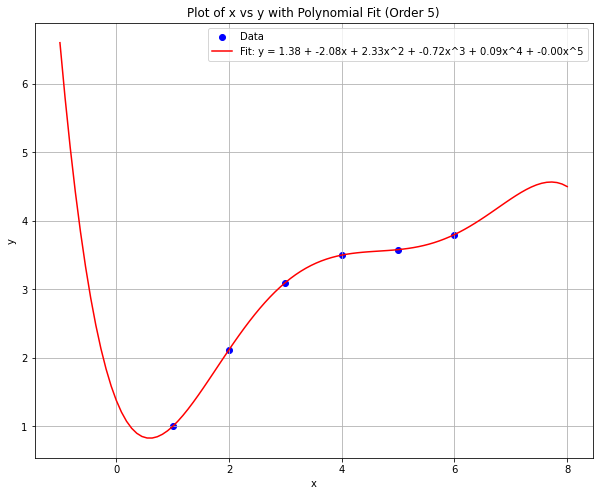

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(x_values, y_values, marker='o', color='b', label='Data')

# Ajustamos polinomio de orden 5 y = w_0 + w_1*x + ... + w_5*x^5
X = np.array(x_values).reshape(-1, 1)
Y = np.array(y_values)
X_poly = np.hstack([X**i for i in range(6)])  # Agregamos columnas para x^0, x^1, x^2, ..., x^5
W = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ Y  # Calculamos parametros w_0, w_1, ..., w_5
x_fit = np.linspace(min(x_values)-2, max(x_values)+2, 100)
y_fit = sum(W[i] * x_fit**i for i in range(6))
plt.plot(x_fit, y_fit, color='r', label=f'Fit: y = {W[0]:.2f} + {W[1]:.2f}x + {W[2]:.2f}x^2 + {W[3]:.2f}x^3 + {W[4]:.2f}x^4 + {W[5]:.2f}x^5')

plt.title('Plot of x vs y with Polynomial Fit (Order 5)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

> ➡️ Vemos que aunque la curva ajustada pasa perfectamente los datos, no esperamos que sea un buen predictor de precios de casas. <font color=red>__Overfitting__</font>.

- Como vemos en las gráficas, <font color=blue>la elección de features es crucial para asegurar un buen performance</font>.
- Veamos en detalle la regresión lineal localmente ponderada, la cual (asumiendo que hay suficiente data de entrenamiento), hace que la elección de features sea menos crítica.

##### Procedimiento: Regresión Lineal Localmente Ponderada
- Ajustamos una función lineal solamente a un conjunto local de puntos delimitados por una región, utilizando mínimos cuadrados ponderados.
- Los pesos están dados por las alturas de una __función de ponderación (kernel function)__ que nos da:
    - Más peso en puntos cercanos al punto objetivo $x_o$ cuya respuesta se está estimando.
    - Menos peso a los puntos más lejanos. 
- Obtenemos entonces un modelo ajustado que retiene solamente los puntos del modelo que están cerca del punto objetivo ($x_0$).
- Luego, el punto objetivo se aleja en el eje x y el procedimiento se repite para cada punto.

<div style="text-align: center;">
    <img style="width: 40%;" src="img/lineal4.png">
</div>

<div style="text-align: center;">
    <img style="width: 40%;" src="img/loess.gif">
</div>


Supongamos que queremos evaluar la función de hipótesis $h$ en cierto punto query $x$. 
- En regresión lineal:
    - Ajustamos $w$ para minimizar la función de costo $$J(W) = \frac{1}{2} \sum_{i=1}^{N}(y_{i}-\hat{y}_{i}(x_i, w))^{2} $$
    - Obtenemos como salida $w^Tx$

- En regresión lineal __localmente ponderada__:
    - Ajustamos $w$ para minimizar la función de costo $$\boxed{J(W) = \frac{1}{2} \sum_{i=1}^{N}k_i(y_{i}-\hat{y}_{i}(x_i, w))^{2}} $$
    - Donde $k$ es una __función de ponderación__ que da un valor $∈ [0,1]$ que nos dice que tanto debemos pesar los valores de $(x_i, y_i)$ cuando ajustamos una recta en el vecindario de $x$. En general, una opción común de $k_i$ es: $$ k_i = exp (-\frac{(x_i - x)^2}{2\tau^2})$$
    Si $x$ es un vector, entonces se generaliza a:$$ k_i = exp (-\frac{(x_i - x)^T(x_i - x)}{2\tau^2})$$
    De esta forma:
    
        - Si $|x_i - x|$ es chico (el ejemplo $x_i$ esta cerca al punto query $x$) → $k_i \approx e^0 = 1$.
        - Si $|x_i - x|$ es grande (el ejemplo $x_i$ esta lejos al punto query $x$) → $k_i = e^{-\text{num grande}} \approx 0$.

        Geometricamente, el peso de las muestras individuales en el vecindario de $x$ son representadas por la altura de la curva $k_i$ en ese punto. Como la curva esta centrada en $x$, se pesan más las muestras más cercanas a el.

        _Nota: Si bien es una curva con forma de campana, esto NO es una función de densidad de probabilidad Gaussiana. Los $k_i$ no tienen que ver con gaussianas, y en particular no son variables aleatorias normalmente distribuidas. Además, $k_i$ no integra a 1._

    

#### Parámetro de Ancho de Banda
- El hiperparámetro $\tau$ decide el ancho de la vecindad que se debe mirar para ajustar la regresión lineal local.
- Mide que tan rápido el peso de un ejemplo de entrenamiento cae con la distancia desde el punto de query.
    - Si $\tau$ es muy ancho: underfitting.
    - Si $\tau$ es muy delgado: overfitting.
<div style="text-align: center;">
    <img style="width: 30%;" src="img/weight_function.png">
</div>

#### Aprendizaje Paramétrico vs. No Paramétrico
- Regresión Lineal
    - La regresión lineal (no ponderada) es un __algoritmo de aprendizaje paramétrico__, es decir, ajusta un conjunto fijo de parámetros $w$ a tus datos.
    - No importa cuán grande sea tu conjunto de entrenamiento, una vez que entrenas tu modelo y ajustas los parámetros, podrías borrar todo el conjunto de entrenamiento de la memoria y hacer predicciones solo usando los parámetros $w$. Tus parámetros representan así un resumen de tu conjunto de datos original.

- Regresión Lineal Ponderada Localmente
    - La regresión ponderada localmente es un __algoritmo de aprendizaje no paramétrico__. 
    - La cantidad de datos que necesitas mantener para representar la hipótesis $h(\cdot)$ crece con el tamaño del conjunto de entrenamiento. En el caso de la regresión localmente ponderada, esta tasa de crecimiento es lineal.

#### 👍 <font color=green>Ventajas</font>
- Principal ventaja: ajusta a un dataset no lineal sin necesidad de manipular manualmente las features (y evitamos overfitting!).
- No requiere la especificación de una función para ajustar un modelo a todos los datos de la muestra.
- Solo requiere como parámetros la función de ponderación y $\tau$.
- Es muy flexible,  puede modelar procesos complejos para los que no existe ningún modelo teórico.
- Es considerado uno de los métodos de regresión modernos más atractivos para aplicaciones que se ajustan al marco general de la regresión de mínimos cuadrados pero que tienen una estructura determinista compleja.

#### 👎 <font color=red>Desventajas</font>
- Requiere mantener todo el conjunto de entrenamiento para poder hacer predicciones futuras.
- El número de parámetros crece linealmente con el tamaño del conjunto de entrenamiento.
- Computacionalmente intensivo, ya que se calcula un modelo de regresión para cada punto.
- Requiere conjuntos de datos bastante grandes y densamente muestreados para producir buenos modelos.
- Al igual que otros métodos de mínimos cuadrados, es propensos al efecto de outliers en el conjunto de datos.
- Si bien se puede generalizar a mas dimensiones, si es mayor a 3 o 4 dimensiones puede no performar bien porque en general no van a haber muchas muestras cercanas al punto de query.


### 💻 Implementación en Python

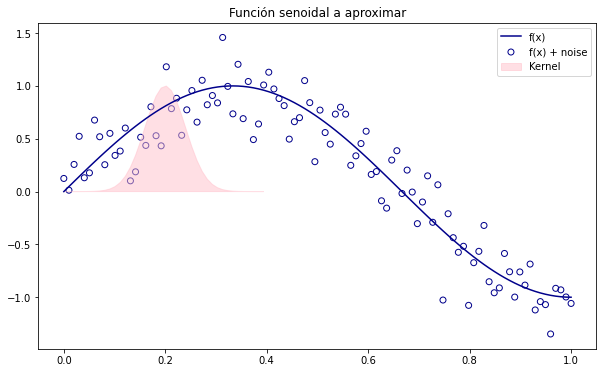

In [5]:
np.random.seed(42)

x = np.linspace(0,1,100)
noise = np.random.normal(loc = 0, scale = .25, size = 100)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = y + noise

plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'darkblue', label = 'f(x)')
plt.scatter(x, y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'f(x) + noise')
plt.fill(x[:40],np.exp(-(x[:40] - 0.2)**2/(2*(0.04)**2)), color = 'pink', alpha = .5, label = 'Kernel')
plt.legend()
plt.title("Función senoidal a aproximar")
plt.show()

#### Solución en Forma Cerrada para Regresión Lineal Localmente Ponderada

- Para llegar a la expresión dada para los parámetros $ W $, necesitamos minimizar $ J(W) $. 

- Para eso, debemos calcular su gradiente con respecto a $ W $ e igualar igual a cero, ya que estamos buscando el punto donde la función de costo alcanza su mínimo. 

- Sustituyendo $ \hat{y}_{i}(x_i, w) = x_i^T w $ en $ J(W) $, obtenemos:

$$
J(W) = \frac{1}{2} \sum_{i=1}^{N} k_i(y_{i}-x_i^T w)^2
$$

- Para minimizar $ J(W) $:

$$
\nabla J(W) = - \sum_{i=1}^{N} k_i(y_{i}-x_i^T w)x_i = 0
$$

$$
\sum_{i=1}^{N} k_i x_i x_i^T w = \sum_{i=1}^{N} k_i x_i y_i
$$

$$
X^T K X W = X^T K Y
$$

Donde:
- $ X $ es la matriz de diseño que contiene los vectores de características $ x_i $ como filas. 
- $ Y $ es el vector de etiquetas.
- $ K $ es una matriz diagonal con $ k_i $ en la $ i $-ésima diagonal. 

- Finalmente, para obtener la solución en forma cerrada para $ W $, simplemente invertimos $ X^T K X $ y la multiplicamos por $ X^T K Y $:

$$
\boxed{W = (X^T K X)^{-1} (X^T K Y)}
$$

Esta es la expresión para los parámetros $ W $ utilizando la solución en forma cerrada.


In [6]:
%load_ext autoreload
%autoreload 2

from LWR import LocallyWeightedRegression

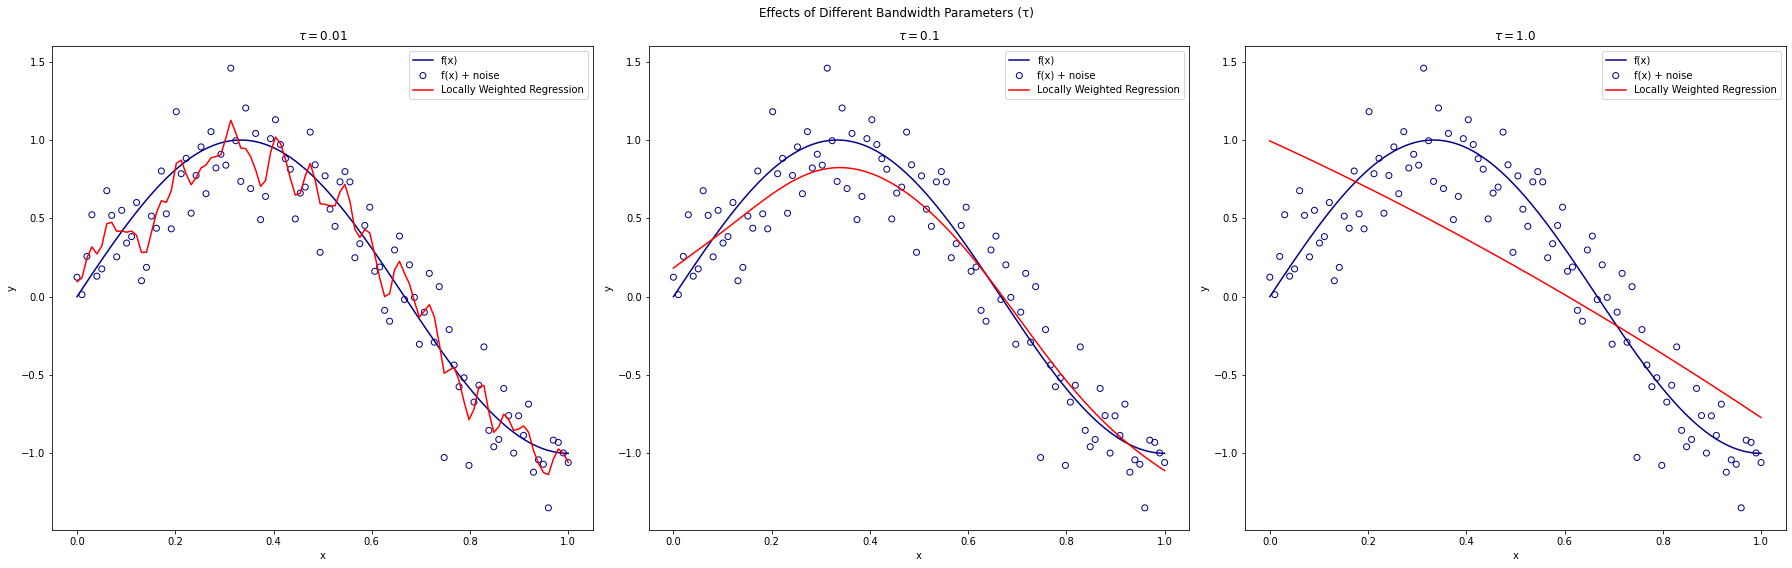

In [10]:
tau_values = [0.01, 0.1, 1.0]

plt.figure(figsize=(25, 8)) 
for i, tau in enumerate(tau_values, start=1):
    lw_regression = LocallyWeightedRegression(tau)
    X = x.reshape(-1, 1) 
    Y = y_noise.reshape(-1, 1) 
    # Predict output for a range of query points
    query_x = np.linspace(0, 1, 100)
    predictions = []
    for qx in query_x:
        _, pred = lw_regression.predict(X, Y, qx)
        predictions.append(pred.item())

    plt.subplot(1, len(tau_values), i)
    plt.plot(x, y, color='darkblue', label='f(x)')
    plt.scatter(x, y_noise, facecolors='none', edgecolor='darkblue', label='f(x) + noise')
    plt.plot(query_x, predictions, color='red', label='Locally Weighted Regression')
    plt.title(f'$\\tau = {tau}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.suptitle('Effects of Different Bandwidth Parameters (τ)')
plt.tight_layout()
plt.show()